In [1]:
%matplotlib inline

In [2]:
import dataset
import datetime

from sqlalchemy.sql import func

from brego.utils import now

In [3]:
db = dataset.connect('sqlite:///data/sensors.db')

In [4]:
db.tables

['28-011454fc03aa', '28-011455030caa', 'MCP3008-0', 'devices', 'sessions']

In [5]:
list(db['sessions'].all())

[OrderedDict([('session_id', 1),
              ('start', 1567582690.8948054),
              ('end', '1567590823.37758')]),
 OrderedDict([('session_id', 2),
              ('start', 1567590844.4588492),
              ('end', None)]),
 OrderedDict([('session_id', 3),
              ('start', 1567590876.9654236),
              ('end', None)]),
 OrderedDict([('session_id', 4),
              ('start', 1567590902.5076456),
              ('end', None)]),
 OrderedDict([('session_id', 5),
              ('start', 1567590919.0247076),
              ('end', '1567590985.88466')]),
 OrderedDict([('session_id', 6),
              ('start', 1567591244.9180336),
              ('end', '1567591490.99328')]),
 OrderedDict([('session_id', 7),
              ('start', 1567591498.2022927),
              ('end', '1567593141.88603')]),
 OrderedDict([('session_id', 8),
              ('start', 1567595267.7973034),
              ('end', '1567595318.74058')]),
 OrderedDict([('session_id', 9), ('start', 1567638360.4756

In [6]:
list(db['devices'].all())

[OrderedDict([('device_id', 1),
              ('device_name', '28-011455030caa'),
              ('device_type', 'temperature')]),
 OrderedDict([('device_id', 2),
              ('device_name', '28-011454fc03aa'),
              ('device_type', 'temperature')]),
 OrderedDict([('device_id', 3),
              ('device_name', 'MCP3008-0'),
              ('device_type', 'ADC')])]

In [9]:
import pandas as pd
import seaborn as sns

In [33]:
len(list(db.load_table('28-011455030caa').all()))

183

[OrderedDict([('time', 1567668500.7528734),
              ('valie', None),
              ('session_id', 19),
              ('value', 0.09916951636541271)]),
 OrderedDict([('time', 1567668500.8807042),
              ('valie', None),
              ('session_id', 19),
              ('value', 0.09819247679531018)]),
 OrderedDict([('time', 1567668500.9824622),
              ('valie', None),
              ('session_id', 19),
              ('value', 0.09819247679531018)]),
 OrderedDict([('time', 1567668501.0838277),
              ('valie', None),
              ('session_id', 19),
              ('value', 0.09819247679531018)]),
 OrderedDict([('time', 1567668501.1851993),
              ('valie', None),
              ('session_id', 19),
              ('value', 0.09916951636541271)]),
 OrderedDict([('time', 1567668501.2869031),
              ('valie', None),
              ('session_id', 19),
              ('value', 0.09916951636541271)]),
 OrderedDict([('time', 1567668501.3884633),
              

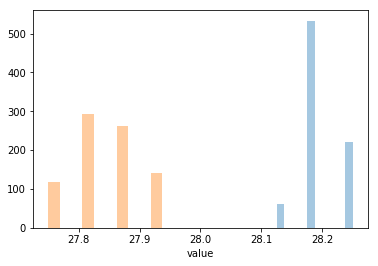

In [14]:
for device in df.device.unique():
    ddf = df.query("device == '{}'".format(device))
    sns.distplot(ddf.value, label=device, kde=False, bins=10)

In [ ]:
sns.kdeplot(df, )

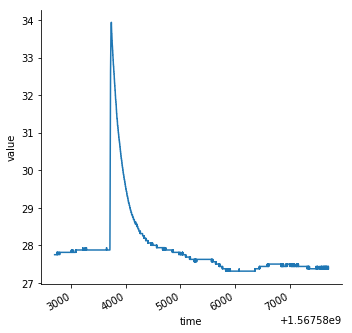

In [42]:
g = sns.relplot(x='time', y='value', kind='line', data=pd.DataFrame(list(db.load_table('28-011454fc03aa').find(session_id=1))))
g.fig.autofmt_xdate()

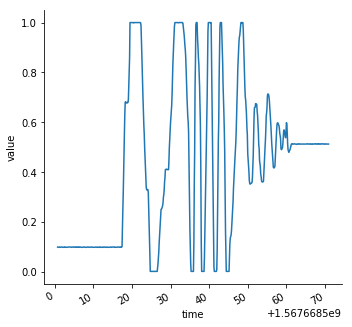

In [11]:
g = sns.relplot(x='time', y='value', kind='line',
                data=pd.DataFrame(list(db.load_table('MCP3008-0').find(session_id=19))))
g.fig.autofmt_xdate()